In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ls

airline.ipynb                         international-airline-passengers.csv


In [3]:
data=pd.read_csv('international-airline-passengers.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
Month                                                                             145 non-null object
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    144 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [5]:
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [6]:
data.columns=['Month','Passengers']

In [7]:
data.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [8]:
import datetime as datetime

In [9]:
data.tail()

,Month,Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [10]:
data=data.drop([144])


In [11]:
data.tail()

,Month,Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [12]:
data.index=data['Month'].values

In [13]:
data=data.drop('Month',axis=1)

In [14]:
data.head()

,Passengers
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [15]:
data.index=pd.Index.to_datetime(data.index)

/Users/JoaoGomes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  """Entry point for launching an IPython kernel.


In [16]:
type(data.index[0])

pandas._libs.tslib.Timestamp

In [17]:
data.head()

,Passengers
1949-01-02,112.0
1949-02-02,118.0
1949-03-02,132.0
1949-04-02,129.0
1949-05-02,121.0


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

/Users/JoaoGomes/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [19]:
result = seasonal_decompose(data['Passengers'].values, model='multiplicative',freq=12)

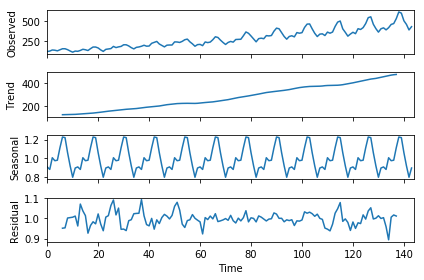

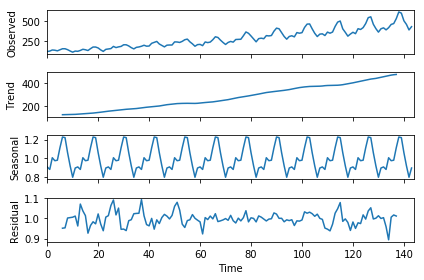

In [20]:
result.plot()

In [25]:
residuals=result.resid

In [26]:
residuals

array([       nan,        nan,        nan,        nan,        nan,
              nan, 0.95166432, 0.95340141, 1.00221977, 1.00402777,
       1.0062701 , 1.01181192, 0.96260299, 1.07146681, 1.03744743,
       1.0140476 , 0.92690297, 0.96504062, 0.98355656, 0.97337205,
       1.02250473, 0.97219282, 0.93895274, 1.00679136, 1.0138446 ,
       1.06401802, 1.0918541 , 1.01766508, 1.05158254, 0.9460444 ,
       0.94740414, 0.93975991, 0.98886374, 0.99388085, 1.0235337 ,
       1.02508244, 1.02588139, 1.09396957, 1.01347341, 0.96955964,
       0.96326725, 1.00037354, 0.94685624, 0.99311706, 0.97463021,
       1.00466865, 1.02027971, 1.01154067, 0.99766844, 1.01516463,
       1.06046444, 1.08023272, 1.04133292, 0.97180563, 0.9551933 ,
       0.98949892, 0.99343371, 1.01926796, 1.00093923, 0.99150389,
       0.98297846, 0.92320316, 1.00444168, 0.99438988, 1.01194791,
       0.99787403, 1.02377529, 0.98451837, 0.98810363, 0.9927613 ,
       0.99951431, 0.9908692 , 1.01540456, 0.98882409, 0.97758

In [27]:
np.isnan(residuals)

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [37]:
residuals=residuals[~np.isnan(residuals)]

In [33]:
type(residuals)

numpy.ndarray

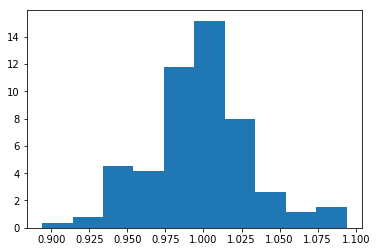

In [45]:
plt.hist(residuals,10,normed=True)
plt.show()

In [48]:
residuals_pd=pd.DataFrame(residuals)

In [49]:
residuals_pd.head()

,0
0,0.951664
1,0.953401
2,1.002220
3,1.004028
4,1.006270


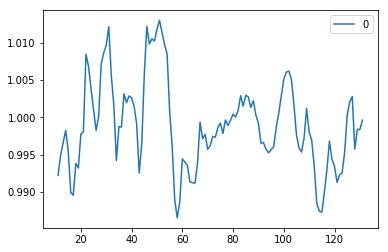

In [51]:
residuals_pd.rolling(12).mean().plot()

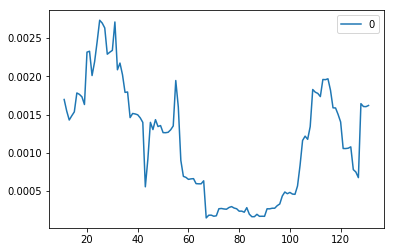

In [52]:
residuals_pd.rolling(12).var().plot()

In [53]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [54]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [58]:
residuals_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 1 columns):
0    132 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


In [59]:
TestStationaryAdfuller(residuals_pd[0])

Test Statistic                -7.415925e+00
p-value                        6.936029e-11
#Lags Used                     7.000000e+00
Number of Observations Used    1.240000e+02
Critical Value (1%)           -3.484220e+00
Critical Value (5%)           -2.885145e+00
Critical Value (10%)          -2.579359e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


Residual is stationary

### Analyse log of data

In [60]:
data.head()

,Passengers
1949-01-02,112.0
1949-02-02,118.0
1949-03-02,132.0
1949-04-02,129.0
1949-05-02,121.0


In [61]:
data['Log']=np.log(data['Passengers'].values)

In [62]:
data.head()

,Passengers,Log
1949-01-02,112.0,4.718499
1949-02-02,118.0,4.770685
1949-03-02,132.0,4.882802
1949-04-02,129.0,4.859812
1949-05-02,121.0,4.795791


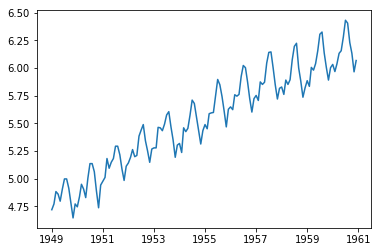

In [64]:
plt.plot(data['Log'])
plt.show()

In [65]:
result_log=seasonal_decompose(data['Log'].values,model='additive',freq=12)

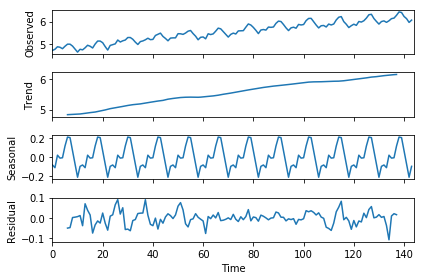

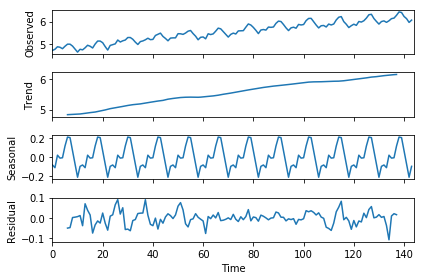

In [66]:
result_log.plot()

In [67]:
residual_log=result_log.resid

In [69]:
residual_log=residual_log[~np.isnan(residual_log)]

(array([ 0.38168503,  0.76337006,  3.43516528,  4.19853534,  7.63370062,
        17.17582639, 10.68718086,  2.67179522,  1.90842515,  1.52674012]),
 array([-0.10862387, -0.08877568, -0.06892749, -0.0490793 , -0.02923111,
        -0.00938292,  0.01046527,  0.03031347,  0.05016166,  0.07000985,
         0.08985804]),
 <a list of 10 Patch objects>)

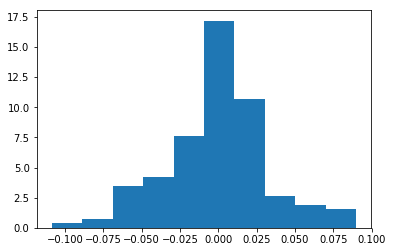

In [75]:
plt.hist(residual_log,10,normed=True)

In [76]:
TestStationaryAdfuller(residual_log)

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [77]:
residual_log_pd=pd.DataFrame(residual_log)

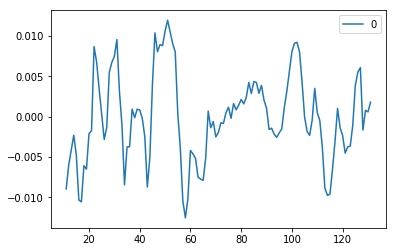

In [78]:
residual_log_pd.rolling(12).mean().plot()

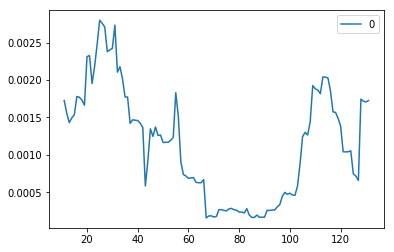

In [79]:
residual_log_pd.rolling(12).var().plot()

In [82]:
var_log=np.sqrt(residual_log.var())

In [88]:
var_log/12

0.002781521125710283

In [85]:
rol_mean=residual_log_pd.rolling(12).mean()

In [87]:
np.sqrt(rol_mean.var())

0    0.00545
dtype: float64

In [89]:
rol_mean_24=residual_log_pd.rolling(24).mean()

In [90]:
np.sqrt(rol_mean_24.var())

0    0.002648
dtype: float64

In [91]:
var_log/np.sqrt(24)

0.006813307466762057

In [98]:
rol_hist=rol_mean[11:]

In [102]:
rol_hist.shape

(121, 1)

In [103]:
type(rol_hist)

pandas.core.frame.DataFrame

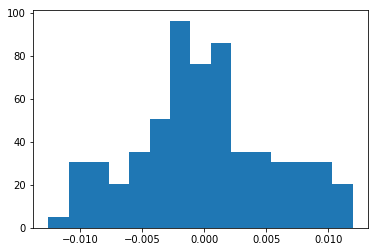

In [107]:
plt.hist(rol_hist[0],15,normed=True)
plt.show()